<a href="https://colab.research.google.com/github/AchlysX/NSL-KDD-intrusion-detection/blob/main/Projet_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Evaluating Machine Learning Models for Intrusion Detection Using the NSL-KDD Dataset**



## Welcome to our Machine Learning Project!

We are a team composed of **Ahmed BENLAFQIH**, **Chinyere CUMMINGS** and **Mohamed SAÏDANE** from OCC group 1 - 4th year students.

Our aim in this project is to develop a machine learning model to classify network connections as normal or malicious using the NSL-KDD dataset (e.g., protocol type, service, flag, duration, and packet statistics). The objective is to improve early intrusion detection and help cybersecurity teams identify anomalies in connected and embedded systems, enhancing real-time defense capabilities.

The database link used for this is : https://www.kaggle.com/code/eneskosar19/intrusion-detection-system-nsl-kdd/input

##Enjoy all our research steps !

Here is a summary of what you will find in this document:


- [1. Introduction](#1-Introduction)
- [2. Méthodes](#2-Méthodes)
- [3. Résultats](#3-Résultats)
- [4. Conclusion](#4-Conclusion)

## 1. Import Dataset
Import NSL-KDD dataset from Kaggle folder.

### All imported librairies and use

In [ ]:
import os #lets Python interact with your computer’s operating system.

import pandas as pd #main tool for data analysis and manipulation in Python - Reading datasets/Managing DataFrames/Cleaning, transforming, and analyzing data efficiently

import matplotlib.pyplot as plt #create visualizations — such as bar charts, line graphs, scatter plots, histograms, etc.


Import NSL-KDD dataset from Kaggle folder.

In [ ]:
##Import content
#Colab files module used for import - For now we select 'KDDTest+.arff' and 'KDDTrain+.arff'
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.arff to KDDTest+.arff
Saving KDDTrain+.arff to KDDTrain+.arff


In [ ]:
# Here we check if the import was correctly placed in the content folder
os.listdir('/content')

['.config', 'KDDTrain+.arff', 'KDDTest+.arff', 'sample_data']

In [ ]:
##Load content
# File paths for training and test sets
train_path = '/content/KDDTrain+.arff'
test_path = '/content/KDDTest+.arff'

# Function to read .arff files (skip metadata header) ---
# Since the NSL-KDD files contain ARFF headers that can cause parsing issues we created
# this function to extract only the data part (after '@data') and load it as CSV into Pandas.
def load_arff_as_csv(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find where @data starts
    start = next(i for i, line in enumerate(lines) if line.strip().lower() == '@data') + 1

    # Read only the data portion
    data = lines[start:]

    # Save temporary CSV
    tmp_path = '/content/temp.csv'
    with open(tmp_path, 'w') as f:
        f.writelines(data)

    # Load into pandas
    df = pd.read_csv(tmp_path, header=None)
    return df

# Load both datasets
df_train = load_arff_as_csv(train_path)
df_test = load_arff_as_csv(test_path)


# Quick Confirmation of Dataset import
print(df_train.head(5))

   0    1         2   3    4     5   6   7   8   9   ...   32    33    34  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...   25  0.17  0.03   
1   0  udp     other  SF  146     0   0   0   0   0  ...    1  0.00  0.60   
2   0  tcp   private  S0    0     0   0   0   0   0  ...   26  0.10  0.05   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  255  1.00  0.00   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  255  1.00  0.00   

     35    36    37    38    39    40       41  
0  0.17  0.00  0.00  0.00  0.05  0.00   normal  
1  0.88  0.00  0.00  0.00  0.00  0.00   normal  
2  0.00  0.00  1.00  1.00  0.00  0.00  anomaly  
3  0.03  0.04  0.03  0.01  0.00  0.01   normal  
4  0.00  0.00  0.00  0.00  0.00  0.00   normal  

[5 rows x 42 columns]


##Data Inspection
Inspect rows, columns, types, and class balance.

In [ ]:
# Basic structure overview
print("Training set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

# Number of rows and columns
n_rows, n_cols = df_train.shape
print(f"\n The training dataset contains {n_rows} rows and {n_cols} columns.")

# Column overview
print("\n Column names:")
print(df_train.columns.tolist())
# Initially, columns are unnamed (0–41) so we assign
#the official NSL-KDD feature names as follows :
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

df_train.columns = columns
df_test.columns = columns

print("\n Column names assigned successfully:")
print(df_train.columns.tolist())

Training set shape: (125973, 42)
Test set shape: (22544, 42)

 The training dataset contains 125973 rows and 42 columns.

 Column names:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

 Column names assigned successfully:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_ser


 Data types summary:
int64      23
float64    15
object      4
Name: count, dtype: int64

 Statistical summary (numeric features):
                      count          mean           std  min  25%   50%  \
duration           125973.0    287.144650  2.604515e+03  0.0  0.0   0.0   
src_bytes          125973.0  45566.743000  5.870331e+06  0.0  0.0  44.0   
dst_bytes          125973.0  19779.114421  4.021269e+06  0.0  0.0   0.0   
land               125973.0      0.000198  1.408607e-02  0.0  0.0   0.0   
wrong_fragment     125973.0      0.022687  2.535300e-01  0.0  0.0   0.0   
urgent             125973.0      0.000111  1.436603e-02  0.0  0.0   0.0   
hot                125973.0      0.204409  2.149968e+00  0.0  0.0   0.0   
num_failed_logins  125973.0      0.001222  4.523914e-02  0.0  0.0   0.0   
logged_in          125973.0      0.395736  4.890101e-01  0.0  0.0   0.0   
num_compromised    125973.0      0.279250  2.394204e+01  0.0  0.0   0.0   

                     75%           max  
d

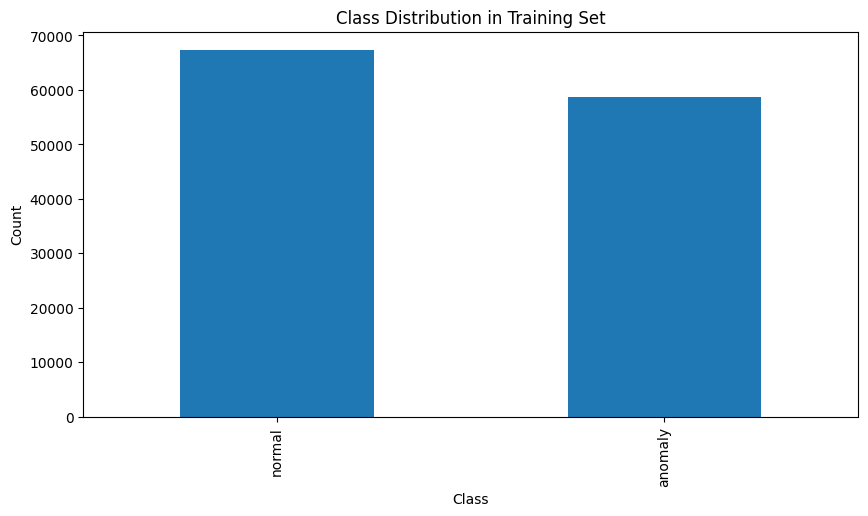

In [ ]:
# Data types and quick info
print("\n Data types summary:")
print(df_train.dtypes.value_counts())

# Summary of numeric columns
print("\n Statistical summary (numeric features):")
print(df_train.describe().T.head(10))

# Check for missing values
print("\n Missing values per column:")
print(df_train.isnull().sum().sort_values(ascending=False).head())

# Check unique values for key categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    if col in df_train.columns:
        print(f"\n Unique values in '{col}': {df_train[col].nunique()} → {df_train[col].unique()[:10]}")

# Class balance (target distribution)
print("\n Class distribution in training data:")
print(df_train['label'].value_counts())
print("\nClass distribution (%)")
print(round(df_train['label'].value_counts(normalize=True) * 100, 2))

#Visual class balance
df_train['label'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
df_train.shape, df_test.shape


((125973, 42), (22544, 42))

In [ ]:
# Step 3.1 - Verify categorical variable meanings
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    print(f"--- {col} ---")
    print("Unique values:", df_train[col].unique()[:15])  # first 15 to keep it short
    print("Number of unique values:", df_train[col].nunique())
    print()

--- protocol_type ---
Unique values: ['tcp' 'udp' 'icmp']
Number of unique values: 3

--- service ---
Unique values: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50']
Number of unique values: 70

--- flag ---
Unique values: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Number of unique values: 11



In [ ]:
# Step 3.2 - Separate features (X) and target label (y)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [ ]:
# Step 3.3 - One-hot encode categorical features
X_train_enc = pd.get_dummies(X_train, columns=['protocol_type', 'service', 'flag'])
X_test_enc = pd.get_dummies(X_test, columns=['protocol_type', 'service', 'flag'])

# Align columns between train and test
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

print("Encoded train shape:", X_train_enc.shape)
print("Encoded test shape:", X_test_enc.shape)


Encoded train shape: (125973, 122)
Encoded test shape: (22544, 122)


In [ ]:
# Step 3.4 - Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_enc, y_train)

print("\nAfter SMOTE:")
print(y_train_bal.value_counts())


Before SMOTE:
label
normal     67343
anomaly    58630
Name: count, dtype: int64

After SMOTE:
label
normal     67343
anomaly    67343
Name: count, dtype: int64


In [ ]:
# Step 3.5 - Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test_enc)


In [ ]:
#Train/test split (80/20)
from sklearn.model_selection import train_test_split

X = pd.concat([X_train_enc, X_test_enc])
y = pd.concat([y_train, y_test])

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#Quick check with a simple model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=300)
model.fit(X_train_scaled, y_train_bal)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     anomaly       0.92      0.63      0.74     12833
      normal       0.65      0.92      0.76      9711

    accuracy                           0.75     22544
   macro avg       0.78      0.78      0.75     22544
weighted avg       0.80      0.75      0.75     22544



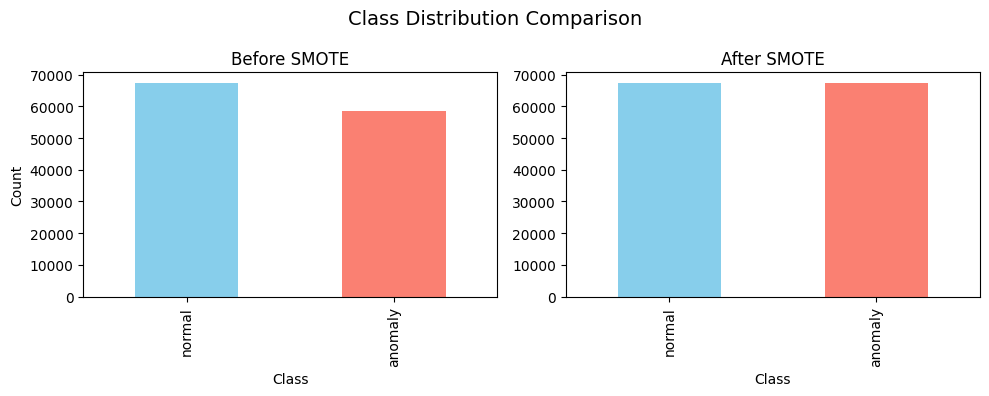

In [ ]:
#visual summary
import matplotlib.pyplot as plt

# Class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
y_train.value_counts().plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
y_train_bal.value_counts().plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")

plt.suptitle("Class Distribution Comparison", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
#consistency check
print("X_train_bal shape:", X_train_bal.shape)
print("y_train_bal shape:", y_train_bal.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


X_train_bal shape: (134686, 122)
y_train_bal shape: (134686,)
X_test_scaled shape: (22544, 122)
y_test shape: (22544,)


Decision Tree

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Classifier Report:
              precision    recall  f1-score   support

     anomaly       0.87      0.67      0.75     12833
      normal       0.66      0.86      0.75      9711

    accuracy                           0.75     22544
   macro avg       0.76      0.77      0.75     22544
weighted avg       0.78      0.75      0.75     22544



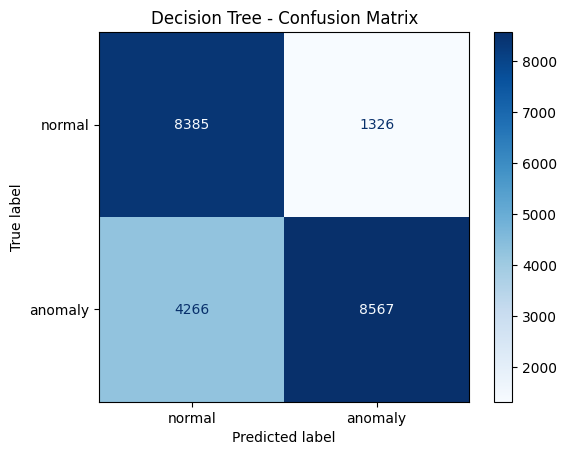

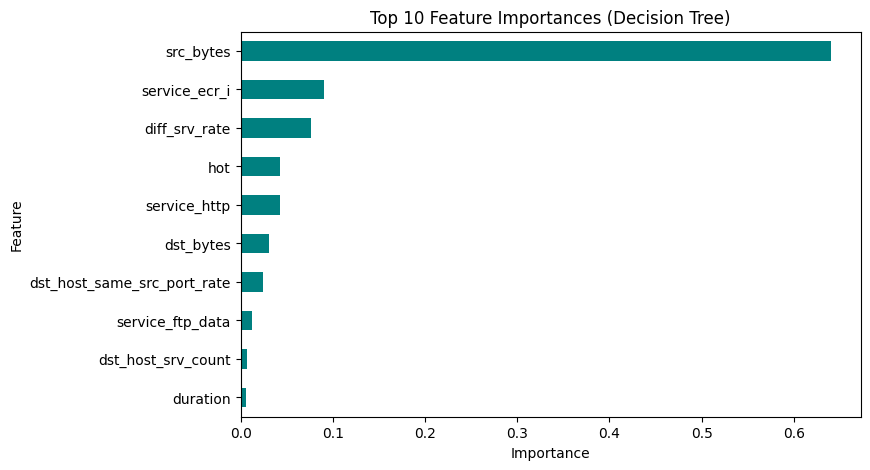

In [ ]:
# Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Création et entraînement du modèle
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=42
)

dt_model.fit(X_train_bal, y_train_bal)

# Prédictions sur le jeu de test
y_pred_dt = dt_model.predict(X_test_scaled)

# Évaluation des performances
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_dt, labels=['normal', 'anomaly'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'anomaly'])
disp.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Importance des caractéristiques
importances = pd.Series(dt_model.feature_importances_, index=X_train_bal.columns)
importances = importances.sort_values(ascending=False)[:10]  # top 10 features

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


Random Forest

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Classifier Report:
              precision    recall  f1-score   support

     anomaly       0.89      0.69      0.77     12833
      normal       0.68      0.89      0.77      9711

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.80      0.77      0.77     22544



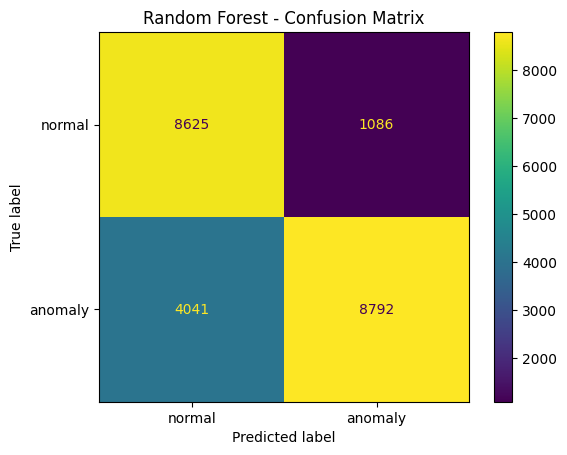

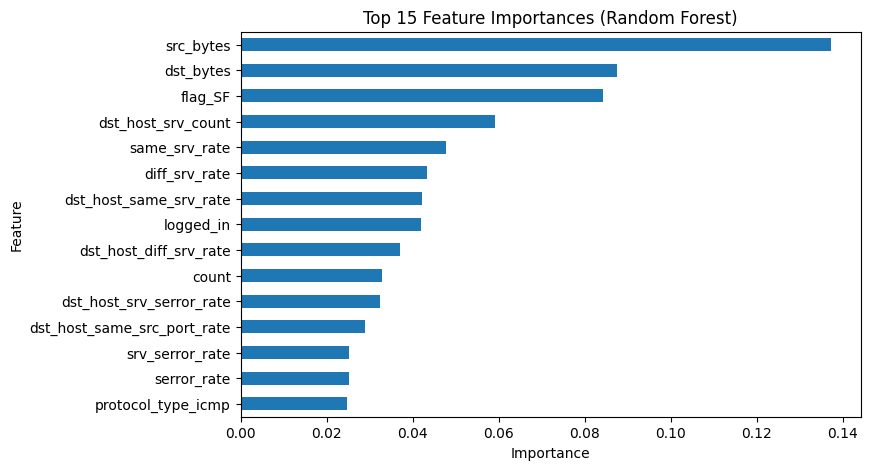

In [ ]:
#Impory
from sklearn.ensemble import RandomForestClassifier

# Modèle de base
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# Entraînement
rf_model.fit(X_train_bal, y_train_bal)

# Prédictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Rapport de classification
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf, labels=['normal', 'anomaly'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'anomaly'])
disp.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Top 15 features importantes
importances = pd.Series(rf_model.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(8,5))
importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

SVM

In [ ]:
#Import
from sklearn.svm import SVC

# Modèle
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train_bal, y_train_bal)

# Prédiction sur le test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Rapport de classification
print(" SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm, labels=['normal', 'anomaly'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'anomaly'])
disp.plot(cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()

Apply cross-validation to check overfitting

In [ ]:
#Import
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
print(" Validation croisée (5 folds) sur le modèle SVM...")


# On évalue avec la métrique F1-score (plus pertinente que accuracy ici)
cv_scores = cross_val_score(
    svm_model,
    X_train_bal,
    y_train_bal,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

print("\nRésultats de la validation croisée (F1-score macro) :")
print("Scores par pli :", np.round(cv_scores, 4))
print("Moyenne :", round(cv_scores.mean(), 4))
print("Écart-type :", round(cv_scores.std(), 4))